# Project 2:

## Data 620 Web Analytics

### Nnaemezue Obi-eyisi

### 10/13/18



## Data Acquistion & Background
http://konect.uni-koblenz.de/networks/discogs_lstyle
For project # 1, we used the [Contacts in a workplace](http://www.sociopatterns.org/datasets/contacts-in-a-workplace/) dataset from sociopatterns.org. It was difficult to find a site with sets that contained node attributes, but this one has several.

The edges in this network are face-to-face employee contacts for an office building in France, and the nodes have one attribute, which is the employee's department.


In [19]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite as bi


github_url = 'https://raw.githubusercontent.com/kylegilde/D620-Web-Analytics-Group-Project/master/project-02-bipartite-analysis/data/out-p%s.discogs_lstyle_lstyle'


df1 = pd.read_csv(github_url % '1', sep=' ', header=None, index_col=False, names=['label_node', 'style_node'])
df2 = pd.read_csv(github_url % '2', sep=' ', header=None, index_col=False, names=['label_node', 'style_node'])
df3 = pd.read_csv(github_url % '3', sep=' ', header=None, index_col=False, names=['label_node', 'style_node'])

df = df1.append(df2).append(df3).sample(1000, random_state=1)

l_nodes = list(df['label_node'])
s_nodes = list(df['style_node'])
edge_bunch = [tuple(i) for i in df.values]

g = nx.Graph()
g.add_nodes_from(l_nodes,node_type='label', bipartite=0)
g.add_nodes_from(s_nodes,node_type='style', bipartite=1)
g.add_edges_from(edge_bunch)
bipartite_G=g







Let's find the number of node

In [17]:
len(bipartite_G)

982

Let's analyse the number of nodes in each subgraph. Plotting it in a histogram

(array([85.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2. ,  63.5, 125. , 186.5, 248. , 309.5, 371. , 432.5, 494. ,
        555.5, 617. ]),
 <a list of 10 Patch objects>)

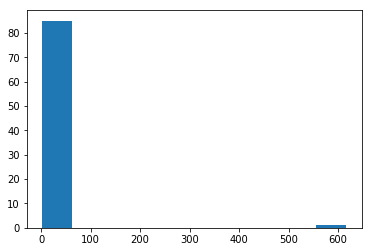

In [12]:
x=[len(c) for c in nx.connected_component_subgraphs(bipartite_G)] 
plt.hist(x) 

Based on our analysis we notice that the largest subgraph has about 617 nodes. We would focus our analysis on that


In [13]:
big_subg = [i for i in nx.connected_component_subgraphs(bipartite_G) if len(i) > 600]
# Largest:
sg_largest = big_subg[0] 

Let's draw the network

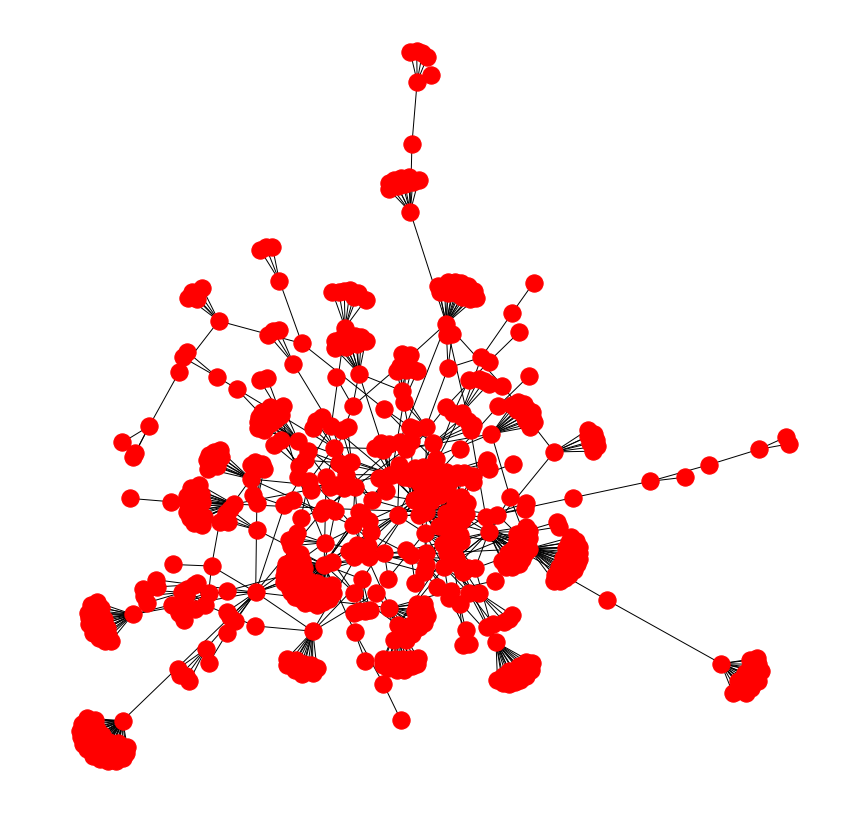

In [14]:
plt.figure(figsize=(11, 11))

nx.draw(sg_largest)

# Let's analyse affiliation network of labels

(array([89.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  60.7, 120.4, 180.1, 239.8, 299.5, 359.2, 418.9, 478.6,
        538.3, 598. ]),
 <a list of 10 Patch objects>)

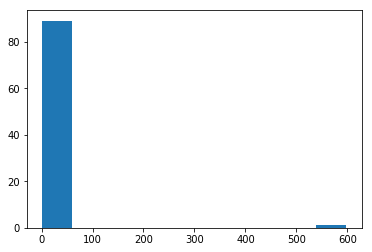

In [22]:
label_net=bi.weighted_projected_graph(bipartite_G, l_nodes, ratio=False)
x=[len(c) for c in nx.connected_component_subgraphs(label_net)] 
plt.hist(x) 

Lets get the main cluster where most of activities is happening for the label netowork
from the plot we see it is where the nodes are greater than 500

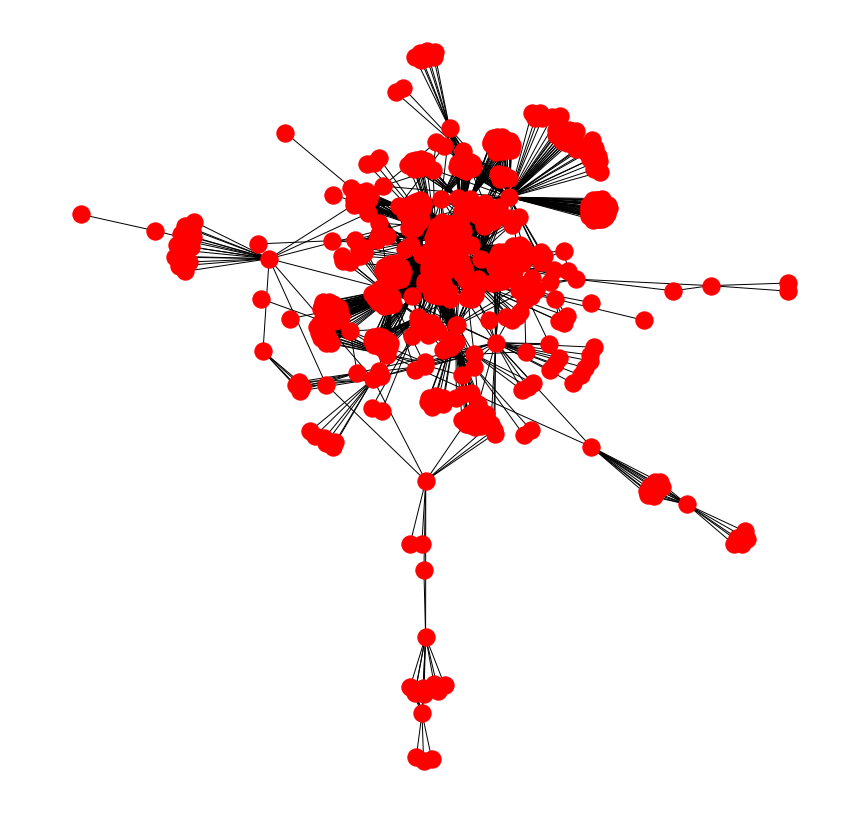

In [24]:
big_sub_label_net = [i for i in nx.connected_component_subgraphs(label_net) if len(i) > 500]
label_g_largest = big_sub_label_net[0] 
plt.figure(figsize=(11, 11))
nx.draw(label_g_largest)


# Degree Centrality of Labels network projection

Look at the number of nodes in this network


In [26]:
len(label_g_largest)

598

Let's find the minimum and maximum number of degrees that exist in our graph for each node by creating a sorted list of all nodes and the degrees

In [45]:
deg=nx.degree(label_g_largest) 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1])

 

The node with the smallest degree centrality is node 6
while the largest is node 1430 with 168 edge links directly connected to it


We can visualize the subgraph of the smallest degree 

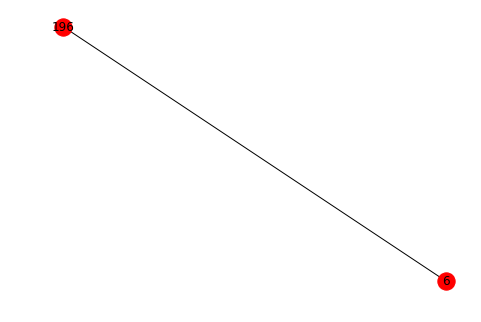

In [42]:
min_deg_node=deg_list[0][0]
list_dn=list(label_g_largest[min_deg_node])
list_dn.append(min_deg_node)
g_sub=label_g_largest.subgraph(list_dn)
nx.draw(g_sub, with_labels=True)

Let's visualize the node with the maximum degree of centrality


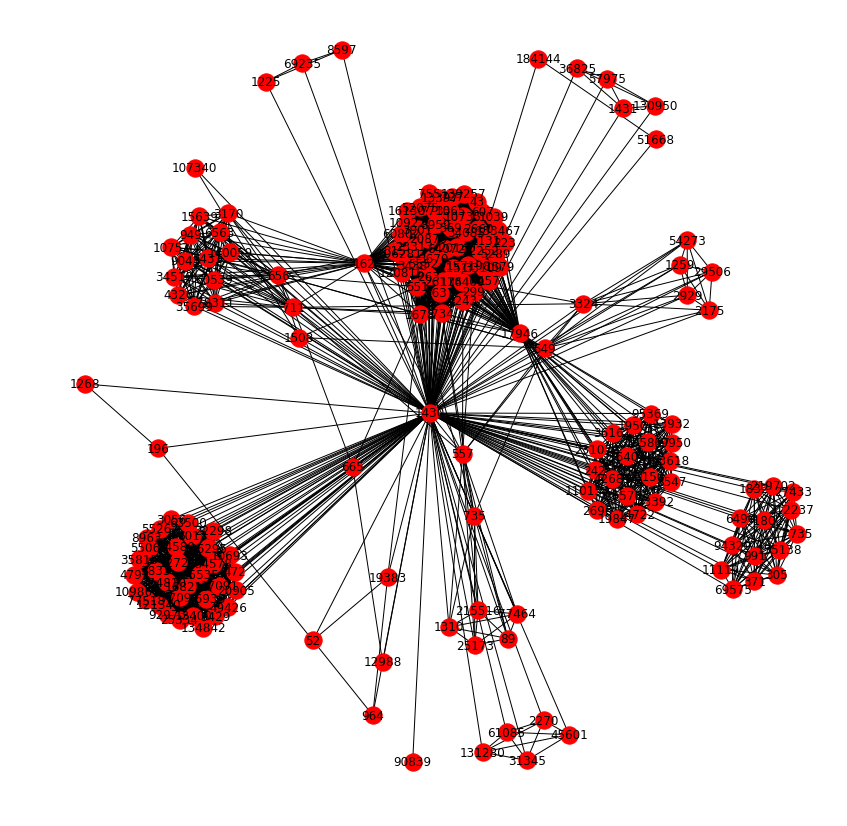

In [44]:
#for the maximum node
max_deg_node=deg_list[len(label_g_largest)-1][0]
list_dn=list(label_g_largest[max_deg_node])
list_dn.append(max_deg_node)
g_sub=label_g_largest.subgraph(list_dn)
plt.figure(figsize=(11, 11))
nx.draw(g_sub, with_labels=True)

In [32]:
#List top 10 most influential nodes 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(1430, 168),
 (506, 146),
 (1678, 117),
 (299, 95),
 (557, 92),
 (553, 91),
 (162, 89),
 (734, 88),
 (618, 79),
 (1668, 78)]

Let's analyze which department has the highest number of degrees in total




## Closeness Centrality

In closeness centrality we calculate for each node the average shortest path to any node on the network

In [34]:
g_close=nx.closeness_centrality(label_g_largest)
g_close

g_close_sorted = sorted(g_close.items(), key=lambda kv: kv[1], reverse=True)
g_close_sorted


g_close_sorted_df=pd.DataFrame(g_close_sorted, columns=['node','closeness'])
g_close_sorted_df[:10]



,node,closeness
0,1430,0.469709
1,557,0.460293
2,734,0.459231
3,1678,0.459231
4,299,0.449548
5,506,0.448872
6,549,0.443866
7,4243,0.442878
8,735,0.439617
9,1579,0.429496


As we can see, node 1430 is the node closest to every other node


## Betweenness Centrality

Betweenness is a measure of the degree to which nodes serve as bridges or bottlenecks between parts of the network. Nodes with betweenness connect parts of a network that would not otherwise be connected.

Looking at the 10 nodes with the highest betweenness, we see that this network does not have many nodes that serve as bridges and bottlenecks. 

In [35]:
node_betweenness = nx.betweenness_centrality(label_g_largest)
betw_sorted = sorted(node_betweenness.items(), key=lambda kv: kv[1], reverse=True)
betw_sorted_df = pd.DataFrame(betw_sorted, columns=['node', 'betweenness'])
betw_sorted_df.iloc[0:10,]

,node,betweenness
0,1430,0.332377
1,506,0.212615
2,1678,0.099594
3,70,0.087432
4,735,0.079475
5,557,0.079318
6,5,0.078250
7,196,0.074178
8,32231,0.055423
9,100,0.053298


In the ego graph below, we see that node 804 does have many connections, but that person does not serve as the unique connector between them.

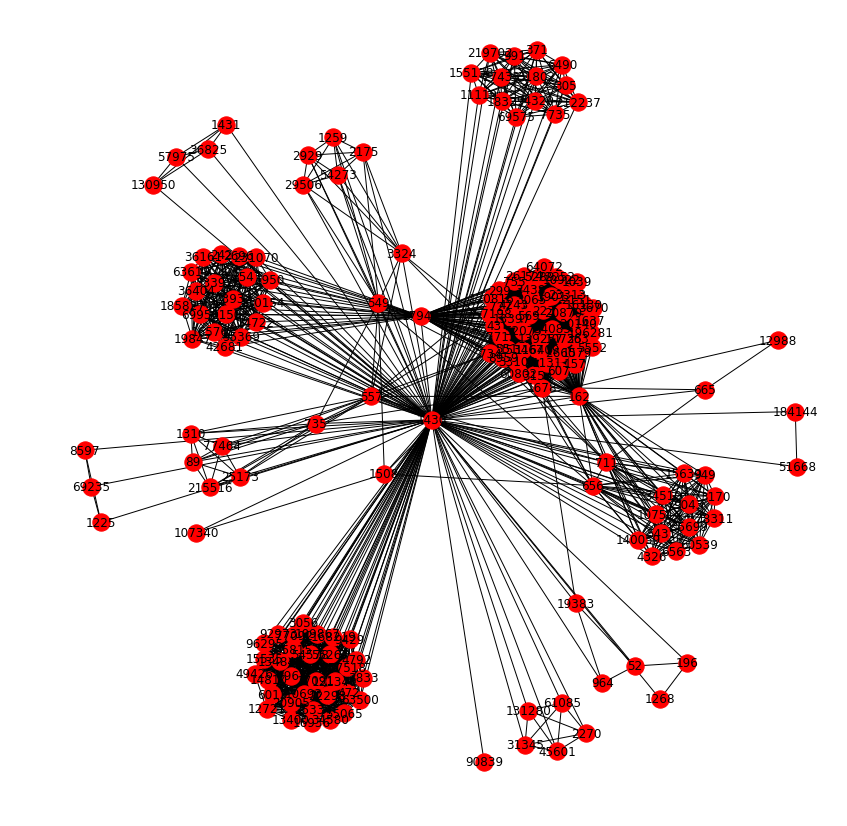

In [36]:
plt.figure(figsize=(11, 11))
g_ego = nx.ego_graph(label_g_largest, betw_sorted_df.iloc[0, 0])
nx.draw(g_ego, with_labels=True)

## Eigenvector Centrality

As Tsvetovat & Kouznetsov explain, "eigenvector centrality is like a recursive version of degree centrality." It is a measure of whether a node knows well-connected people.

It's like a weighted version of degree centrality, where the centrality metric for a node is the sum of all of the degrees possessed by the neighbors normalized by the largest value. This process is repeated until the largest value stops changing. 


In [37]:
node_ev = nx.eigenvector_centrality(label_g_largest)
ev_sorted = sorted(node_ev.items(), key=lambda kv: kv[1], reverse=True)
ev_sorted_df = pd.DataFrame(ev_sorted, columns=['node', 'ev'])
ev_sorted_df.iloc[0:10,]

,node,ev
0,1430,0.152283
1,299,0.150555
2,734,0.149566
3,1678,0.148984
4,4243,0.148066
5,162,0.143668
6,315,0.140461
7,551,0.139987
8,17946,0.139309
9,1579,0.138924


# Let's analyse affiliation network of labels

Look at the number of nodes in this network


(array([87.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  31.1,  61.2,  91.3, 121.4, 151.5, 181.6, 211.7, 241.8,
        271.9, 302. ]),
 <a list of 10 Patch objects>)

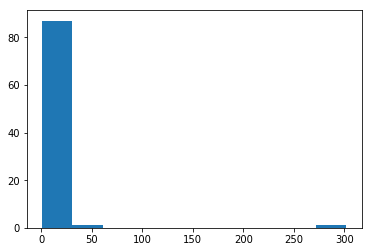

In [47]:
style_net=bi.weighted_projected_graph(bipartite_G, s_nodes, ratio=False)
x=[len(c) for c in nx.connected_component_subgraphs(style_net)] 
plt.hist(x) 

Lets get the main cluster where most of activities is happening for the style netowork
from the plot we see it is where the nodes are greater than 250

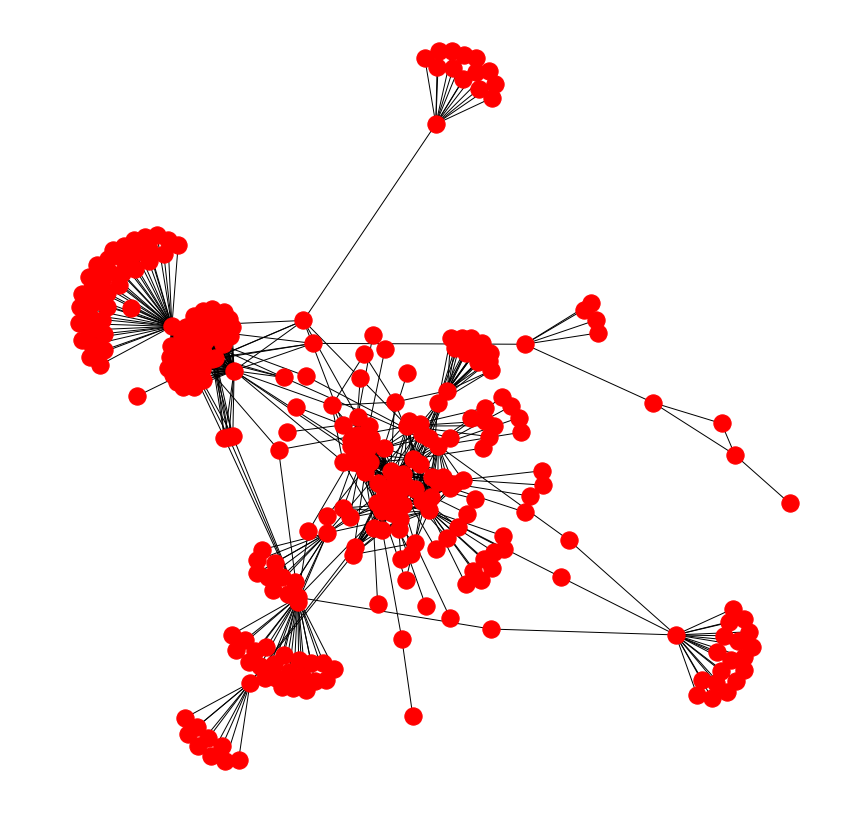

In [49]:
big_sub_style_net = [i for i in nx.connected_component_subgraphs(style_net) if len(i) > 250]
style_g_largest = big_sub_style_net[0] 
plt.figure(figsize=(11, 11))
nx.draw(style_g_largest)

In [51]:
#Degree Style
deg=nx.degree(style_g_largest) 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1])
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(162, 89),
 (263, 54),
 (43, 51),
 (5, 50),
 (223, 50),
 (70, 38),
 (87, 35),
 (204, 31),
 (17, 30),
 (72, 29)]

In [52]:
#Closeness Style
g_close=nx.closeness_centrality(style_g_largest)
g_close

g_close_sorted = sorted(g_close.items(), key=lambda kv: kv[1], reverse=True)
g_close_sorted


g_close_sorted_df=pd.DataFrame(g_close_sorted, columns=['node','closeness'])
g_close_sorted_df[:10]

,node,closeness
0,263,0.395532
1,87,0.392950
2,204,0.385897
3,70,0.363527
4,99,0.360479
5,162,0.359189
6,5,0.352459
7,43,0.343607
8,223,0.343216
9,89,0.341657


In [53]:
#Betweeness Style
node_betweenness = nx.betweenness_centrality(style_g_largest)
betw_sorted = sorted(node_betweenness.items(), key=lambda kv: kv[1], reverse=True)
betw_sorted_df = pd.DataFrame(betw_sorted, columns=['node', 'betweenness'])
betw_sorted_df.iloc[0:10,]

,node,betweenness
0,162,0.273674
1,263,0.260739
2,17,0.201873
3,87,0.175350
4,70,0.149629
5,1430,0.126755
6,12,0.117554
7,3,0.108223
8,5,0.106887
9,204,0.092302


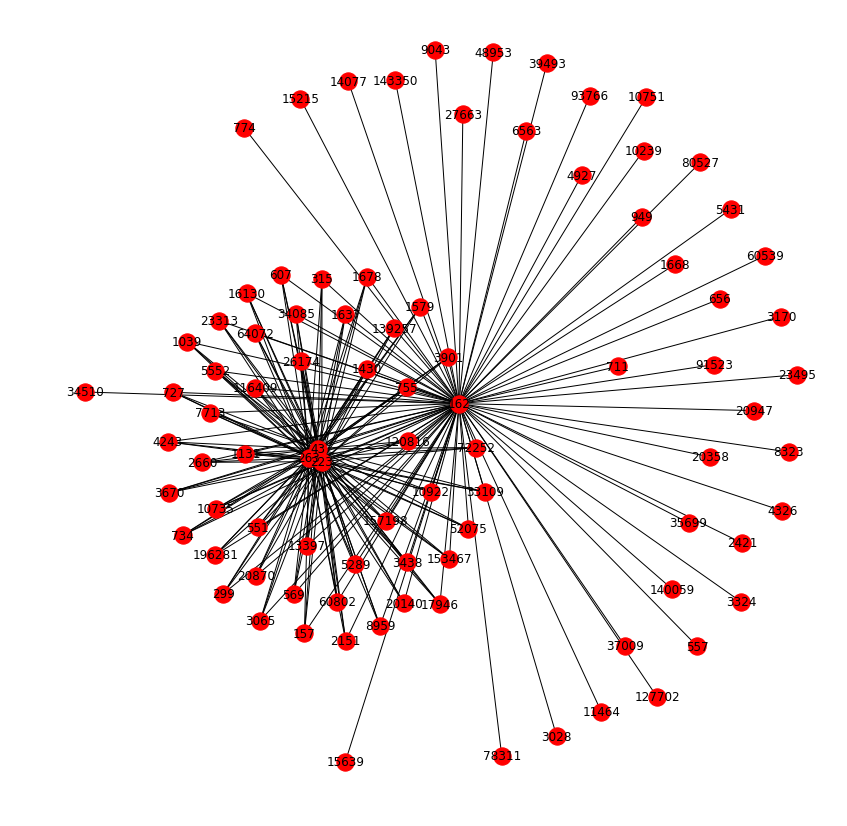

In [54]:
plt.figure(figsize=(11, 11))
g_ego = nx.ego_graph(style_g_largest, betw_sorted_df.iloc[0, 0])
nx.draw(g_ego, with_labels=True)

In [55]:
#Style Eigen
node_ev = nx.eigenvector_centrality(style_g_largest)
ev_sorted = sorted(node_ev.items(), key=lambda kv: kv[1], reverse=True)
ev_sorted_df = pd.DataFrame(ev_sorted, columns=['node', 'ev'])
ev_sorted_df.iloc[0:10,]

,node,ev
0,5,0.266637
1,204,0.231135
2,72,0.227778
3,171,0.224187
4,102,0.216641
5,117,0.210725
6,161,0.208302
7,196,0.206924
8,52,0.204935
9,1,0.203225


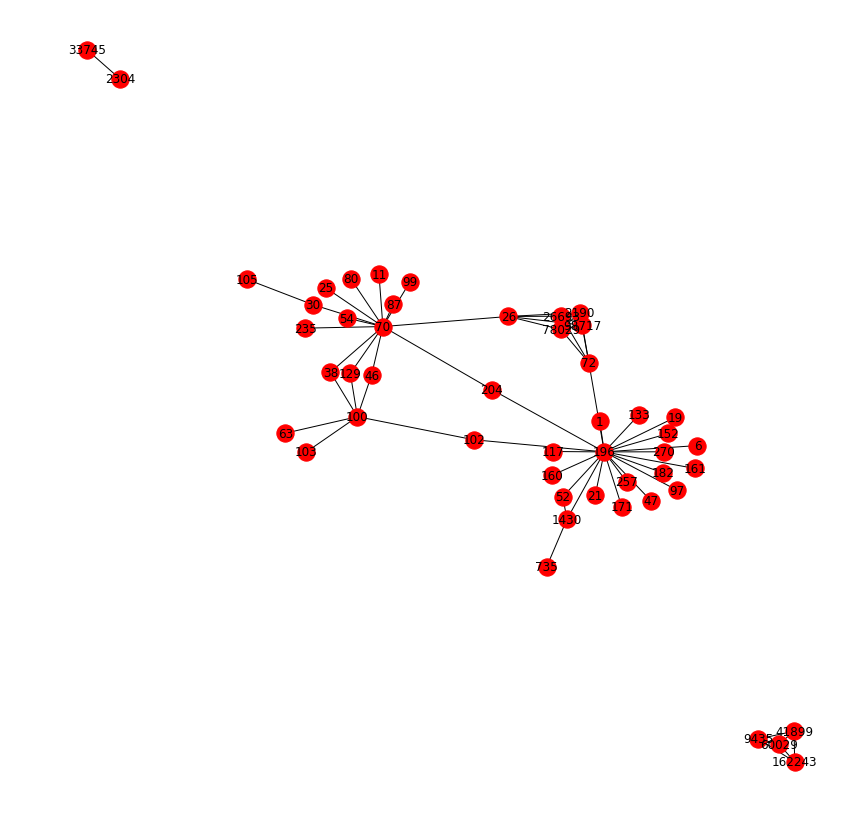

In [58]:
#Eigen Style for node 5

list_dn=list(style_g_largest[5])
list_dn.append(max_deg_node)
g_sub=label_g_largest.subgraph(list_dn)
plt.figure(figsize=(11, 11))
nx.draw(g_sub, with_labels=True)

Conclusion
What I could infer is that the record labels are quite centered on key players that affect or control the music space. while the styles of music can not be centered on one node rather depending on the style the have different levels of influence